In [1]:
# 7) Make a jupyter notebook that uses mdtraj to 
# 	a) read in the md trajectory of beta amyloid in the Data folder
# 	b) compute the end-end distance at each time, and the radius of gyration at each time
# 	c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
# 	d) plot a normalized histogram of end-end distance and another of radius of gyration
	


In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the trajectory and topology
trajectory_file = 'Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'  
topology_file = 'Data/1hz3_T310.start.nowater.gro'  
traj = md.load(trajectory_file, top=topology_file)

# Display basic information about the trajectory
print(traj)


<mdtraj.Trajectory with 17 frames, 408 atoms, 26 residues, and unitcells>


In [4]:
# Select the atom indices for the end-to-end distance calculation
n_residues = traj.n_residues
end_to_end_distance = md.compute_distances(traj, [[0, n_residues - 1]])  # Between first and last residue
radius_of_gyration = md.compute_rg(traj)

# Convert to 1D arrays for easier plotting
end_to_end_distance = end_to_end_distance.flatten()
radius_of_gyration = radius_of_gyration.flatten()
time = traj.time  # Time array in ps


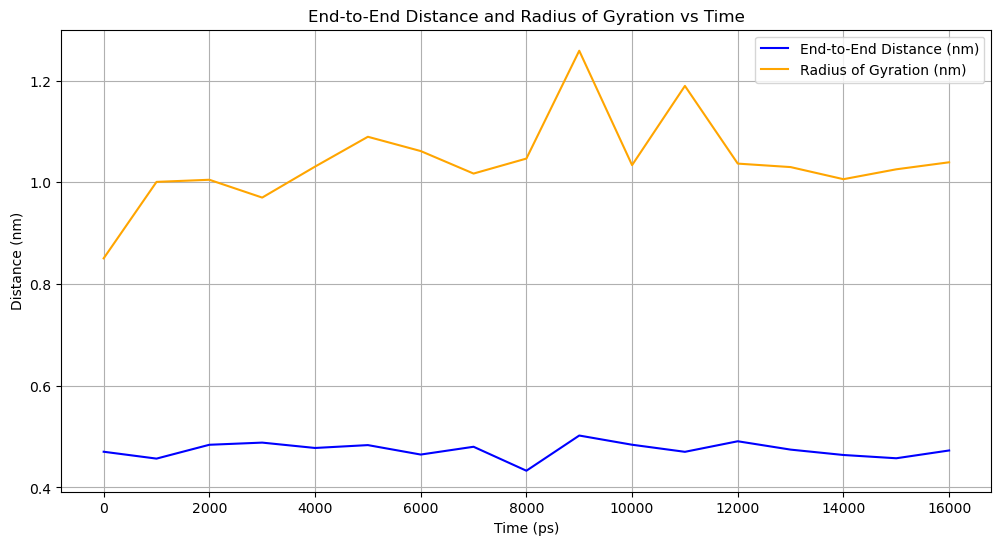

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(time, end_to_end_distance, label='End-to-End Distance (nm)', color='blue')
plt.plot(time, radius_of_gyration, label='Radius of Gyration (nm)', color='orange')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.legend()
plt.grid()
plt.show()


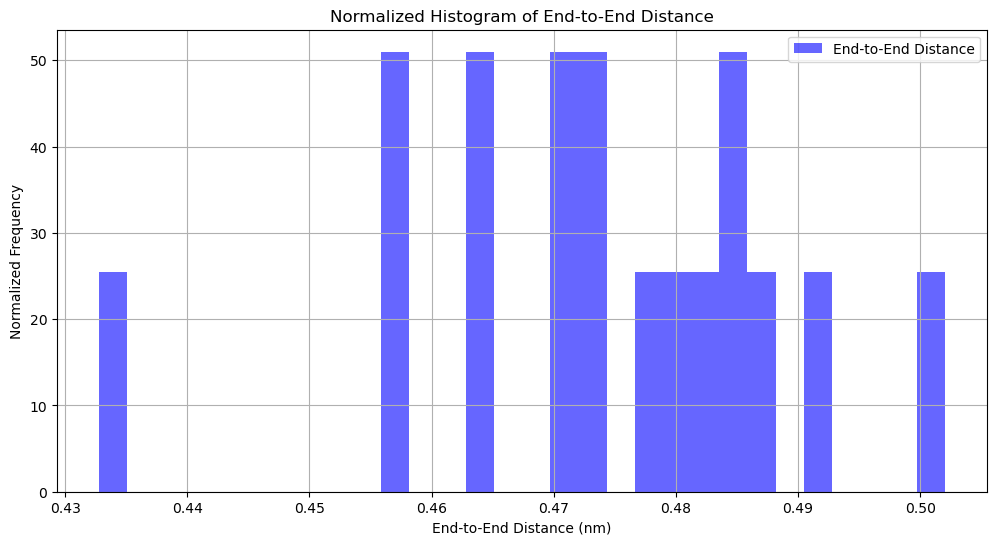

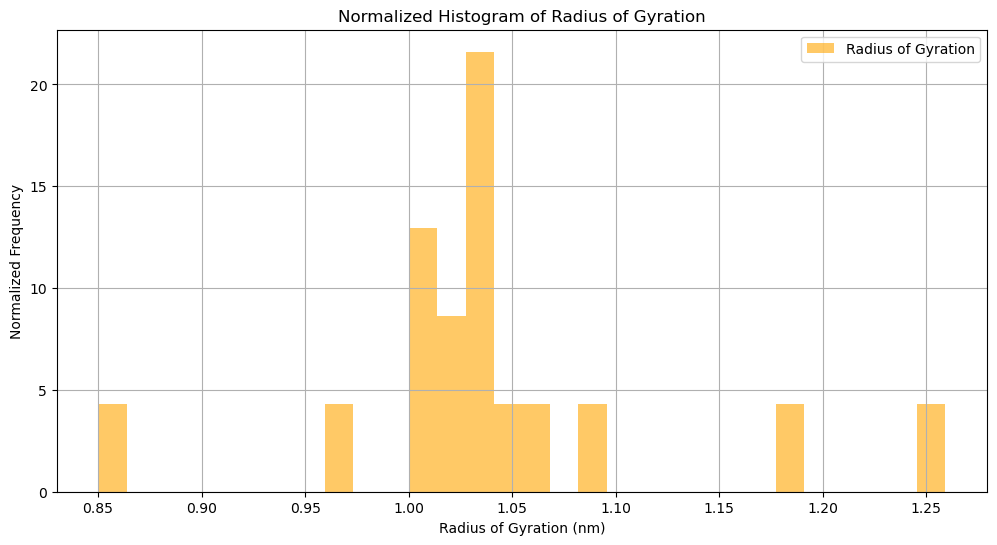

In [6]:
# Plot normalized histogram for End-to-End Distance
plt.figure(figsize=(12, 6))
plt.hist(end_to_end_distance, bins=30, density=True, alpha=0.6, color='blue', label='End-to-End Distance')
plt.title('Normalized Histogram of End-to-End Distance')
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid()
plt.show()

# Plot normalized histogram for Radius of Gyration
plt.figure(figsize=(12, 6))
plt.hist(radius_of_gyration, bins=30, density=True, alpha=0.6, color='orange', label='Radius of Gyration')
plt.title('Normalized Histogram of Radius of Gyration')
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid()
plt.show()
